# Problem statement: 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# #un-mount the google drive
# from google.colab import drive
# drive.flush_and_unmount()

### Importing Skin Cancer Data
#### Take necessary actions to read the data

### Importing all the important libraries

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166


# Importing files from the google drive
data_dir_train = pathlib.Path('/content/drive/MyDrive/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/Test')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
#data_dir_train = pathlib.Path("C:/Users/pendepr/OneDrive - EY/Desktop/Upgrad/Deep_Learning/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
#data_dir_test = pathlib.Path('C:/Users/pendepr/OneDrive - EY/Desktop/Upgrad/Deep_Learning/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_width = 180
img_height = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,image_size=(img_width,img_height),
                                                               batch_size=batch_size,validation_split=0.2,
                                                               subset='training',seed=123)
train_ds

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,image_size=(img_width,img_height),
                                                             batch_size=batch_size,validation_split=0.2,
                                                             subset='validation',seed=123)
val_ds

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

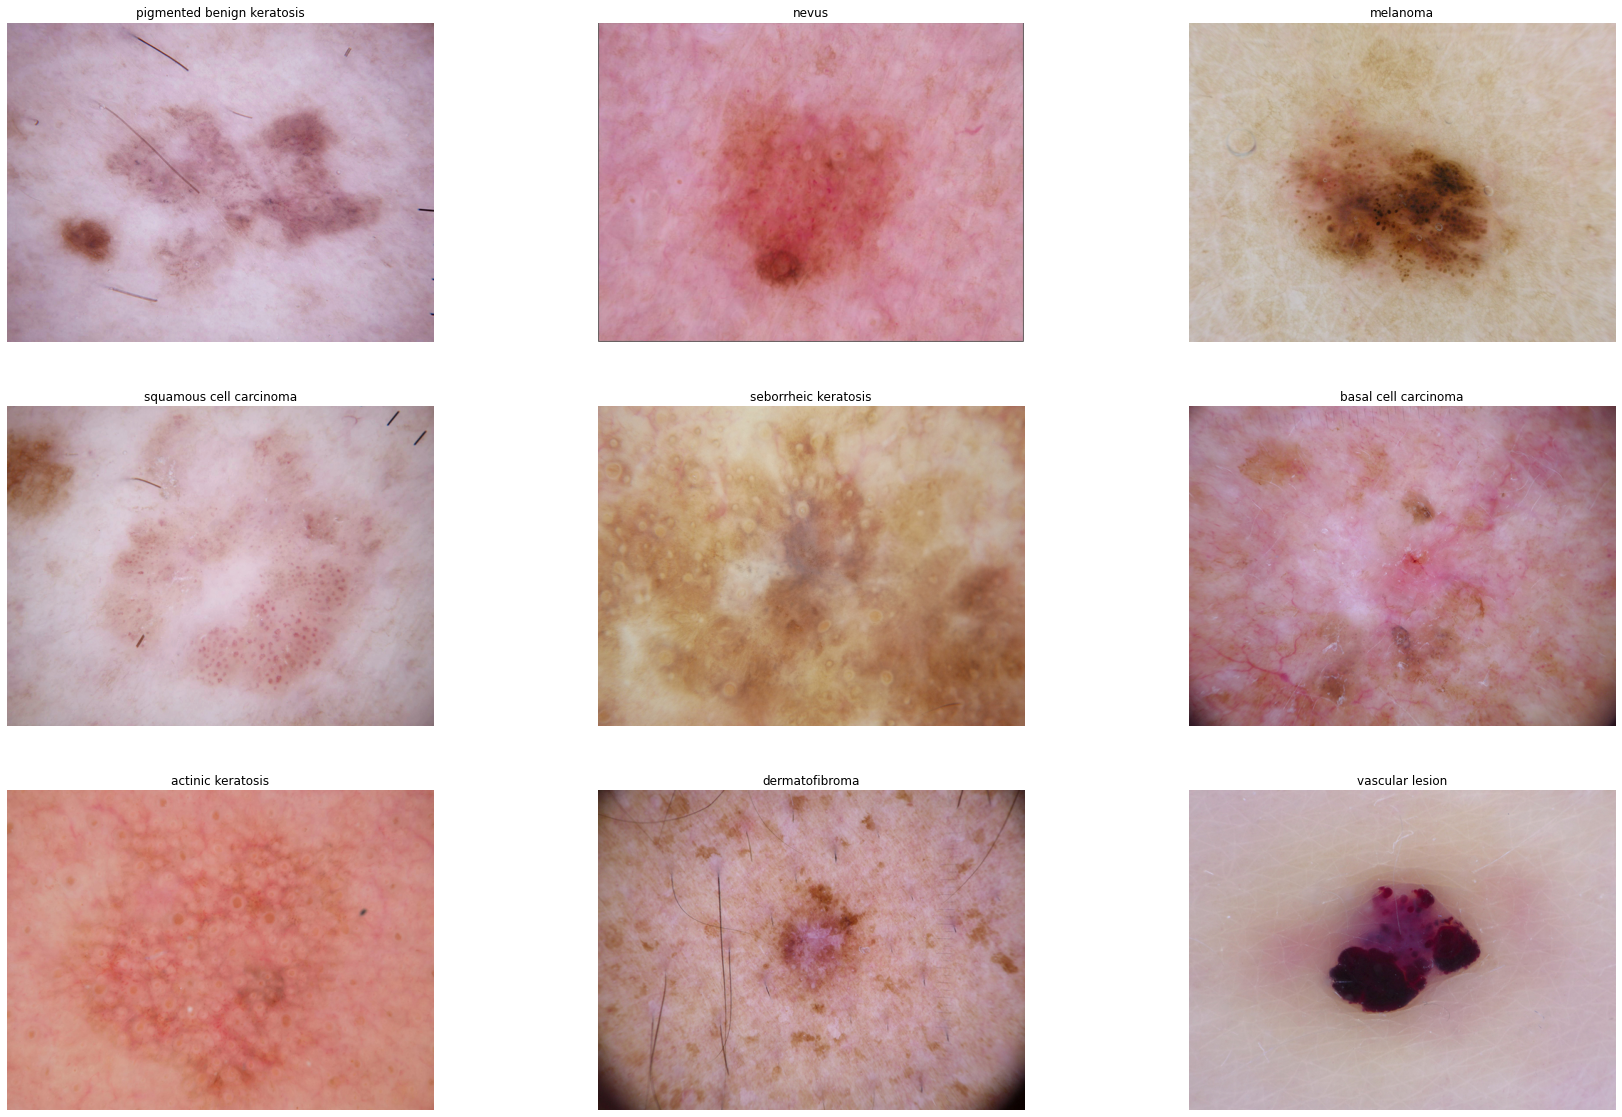

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

from PIL import Image
fig=plt.figure(figsize=(30,20))
c=1
for f in data_dir_train.iterdir():
  im=Image.open(f.iterdir().__next__())
  plt.subplot(3,3,c)
  plt.imshow(im)
  plt.title(str(f).split('/')[-1])
  c+=1
  plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
#Created a CNN model, which can accurately detect 9 classes present in the dataset.
number_of_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255,input_shape=(180,180,3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(number_of_classes)
  
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function.. Defined appropriate optimiser and loss function for model training
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

### Train the model

In [17]:
#Trained the model for ~20 epochs.
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 707s 3s/step - loss: 2.0160 - accuracy: 0.2444 - val_loss: 1.8354 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 2s 29ms/step - loss: 1.7065 - accuracy: 0.3856 - val_loss: 1.5750 - val_accuracy: 0.4698
Epoch 3/20
56/56 [==============================] - 2s 28ms/step - loss: 1.5734 - accuracy: 0.4275 - val_loss: 1.5060 - val_accuracy: 0.4765
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4042 - accuracy: 0.4927 - val_loss: 1.3850 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 2s 29ms/step - loss: 1.3554 - accuracy: 0.5229 - val_loss: 1.4192 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.2780 - accuracy: 0.5558 - val_loss: 1.4223 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 2s 29ms/step - loss: 1.1993 - accuracy: 0.5753 - val_loss: 1.5506 - val_accuracy: 0.4743
Epoch 8/20
56

### Visualizing training results

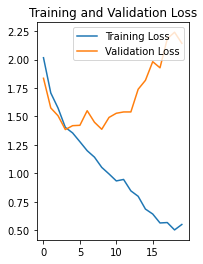

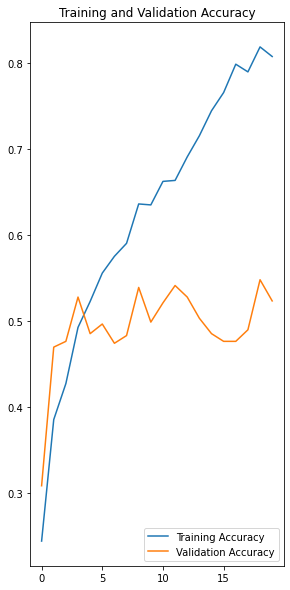

In [18]:
#Visualizing training results
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Please see below findings:  
## Validation accuracy of 0.52 is way less than training accuracy 0.80 after 20 epochs. This is clear evidence of model overfitting !!

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

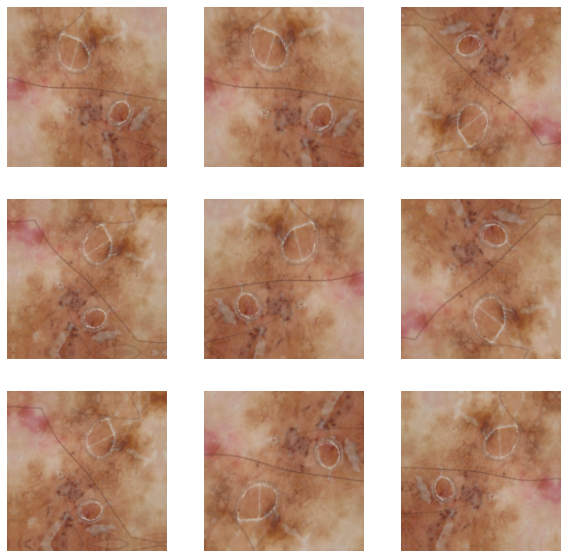

In [20]:
# Your code goes here
# Todo, visualize how your augmentation strategy works for one instance of training image.
for batch,labels in train_ds.take(1):
  image=batch[0]
  image=tf.reshape(image,(1,img_width,img_height,3))
  
plt.figure(figsize=(10, 10))
for i in range(9):
  aug_img = data_augmentation(image)[0]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(aug_img.numpy().astype("uint8"))
  plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_of_classes)
])



### Compiling the model

In [22]:
## Model compliing
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 52ms/step - loss: 1.9935 - accuracy: 0.2723 - val_loss: 1.7554 - val_accuracy: 0.3937
Epoch 2/20
56/56 [==============================] - 3s 48ms/step - loss: 1.6895 - accuracy: 0.3929 - val_loss: 1.7449 - val_accuracy: 0.4049
Epoch 3/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5740 - accuracy: 0.4258 - val_loss: 1.5796 - val_accuracy: 0.4362
Epoch 4/20
56/56 [==============================] - 3s 48ms/step - loss: 1.4619 - accuracy: 0.4738 - val_loss: 1.5296 - val_accuracy: 0.4698
Epoch 5/20
56/56 [==============================] - 3s 46ms/step - loss: 1.4819 - accuracy: 0.4777 - val_loss: 1.4123 - val_accuracy: 0.5391
Epoch 6/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3754 - accuracy: 0.5112 - val_loss: 1.3608 - val_accuracy: 0.5526
Epoch 7/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3373 - accuracy: 0.5240 - val_loss: 1.5234 - val_accuracy: 0.5078
Epoch 8/20
56

### Visualizing the results

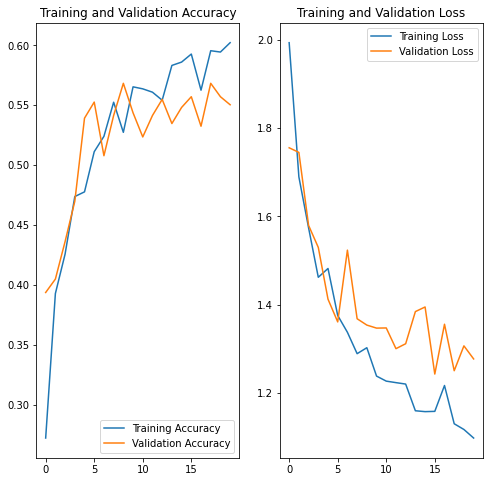

In [24]:
# Visualizing the results after using dropout layer and training the model with 20 epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## Training accuracy - 0.60  - validation accuracy: 0.55. There are quite close and hence we can confirm there is not overfitting
## As Training and validation accuracy are less than 0.60, we can confirm there is no underfitting


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
## Your code goes here.
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [26]:
#Distribution of classes in the dataset
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
l_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dictionary = dict(zip(path_list, l_list))
original_df = pd.DataFrame(list(dataframe_dictionary.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
## - seborrheic keratosis has least number of samples - 77

#### - Which classes dominate the data in terms proportionate number of samples?
## - pigmented benign keratosis dominates other classes -  462


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
#('/content/drive/MyDrive/Train')
#path_to_training_dataset= '/content/drive/MyDrive/Train'
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    #p.process()
    p.sample(1000) ## We are adding 1000 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B30724E50>: 100%|██████████| 1000/1000 [00:47<00:00, 20.88 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6BAEA57C40>: 100%|██████████| 1000/1000 [00:38<00:00, 25.91 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6BA41C6D30>: 100%|██████████| 1000/1000 [00:36<00:00, 27.40 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F6B460986D0>: 100%|██████████| 1000/1000 [02:53<00:00,  5.75 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F6B306FF790>: 100%|██████████| 1000/1000 [02:50<00:00,  5.88 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B4629D310>: 100%|██████████| 1000/1000 [00:36<00:00, 27.59 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F6B460F1F70>: 100%|██████████| 1000/1000 [01:24<00:00, 11.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6BA018D670>: 100%|██████████| 1000/1000 [00:36<00:00, 27.61 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6BA00B33A0>: 100%|██████████| 1000/1000 [00:36<00:00, 27.73 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
from glob import glob
path_list_updated = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_updated[:2]

['/content/drive/MyDrive/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027218.jpg_5481a9b8-604d-4cd5-8ef2-0f7750a2476d.jpg',
 '/content/drive/MyDrive/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024910.jpg_851df3ac-2094-4e33-99f4-974a1f7c58d4.jpg']

In [31]:
lesion_list_updated = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_updated[:2]

['pigmented benign keratosis', 'pigmented benign keratosis']

In [32]:
dataframe_dict_updated = dict(zip(path_list_updated, lesion_list_updated))

In [33]:
df2 = pd.DataFrame(list(dataframe_dict_updated.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [34]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 1000 images to all the classes to maintain some class balance.

#### Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [36]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', #Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),batch_size=batch_size
  )

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### Create a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### Create your model (make sure to include normalization)

In [38]:
numer_of_classes = 9

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(numer_of_classes)
])

#### Compile your model (Choose optimizer and loss function appropriately)

In [39]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

####  Train your model

In [40]:
## Updated the code using 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
281/281 [==============================] - 65s 219ms/step - loss: 1.7695 - accuracy: 0.3172 - val_loss: 1.4410 - val_accuracy: 0.4424
Epoch 2/50
281/281 [==============================] - 52s 183ms/step - loss: 1.4160 - accuracy: 0.4468 - val_loss: 1.2959 - val_accuracy: 0.4904
Epoch 3/50
281/281 [==============================] - 51s 177ms/step - loss: 1.3307 - accuracy: 0.4808 - val_loss: 1.3201 - val_accuracy: 0.4838
Epoch 4/50
281/281 [==============================] - 51s 177ms/step - loss: 1.2566 - accuracy: 0.5050 - val_loss: 1.2401 - val_accuracy: 0.5220
Epoch 5/50
281/281 [==============================] - 50s 175ms/step - loss: 1.1971 - accuracy: 0.5333 - val_loss: 1.1787 - val_accuracy: 0.5367
Epoch 6/50
281/281 [==============================] - 51s 177ms/step - loss: 1.1247 - accuracy: 0.5557 - val_loss: 1.1832 - val_accuracy: 0.5300
Epoch 7/50
281/281 [==============================] - 51s 179ms/step - loss: 1.1358 - accuracy: 0.5597 - val_loss: 1.1162 - val_ac

####  Visualize the model results

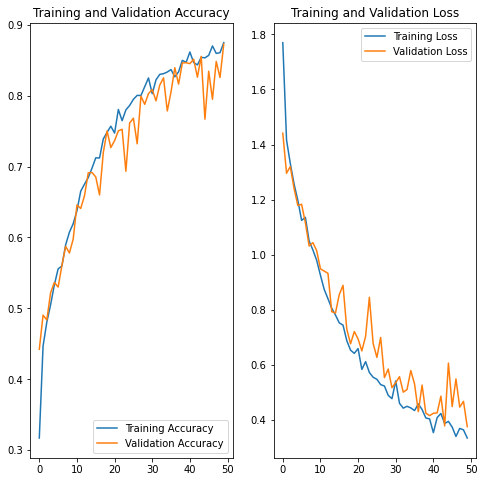

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Underfitting and overfitting has been solved
### Training and Validation accuracy are close - 0.87
### Here the training and validation accuracy higher than the model that we created earlier.

In [43]:
# Augmentor with samples (1000)... Test data accuracy seems not that great !!

test_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,image_size=(img_width,img_height),
                                                            shuffle=False,batch_size=120)
predictions=model.predict(test_ds)
score = tf.nn.softmax(predictions)
_, labels = tuple(zip(*test_ds))
print(labels)
print()
print(np.argmax(score,axis=-1))
print()

from sklearn.metrics import accuracy_score
print('Test Accuracy')
accuracy_score(labels[0].numpy(),np.argmax(score,axis=-1))

Found 118 files belonging to 9 classes.
1/1 [==============================] - 49s 49s/step
(<tf.Tensor: shape=(118,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8], dtype=int32)>,)

[4 4 4 4 4 7 1 4 0 4 4 0 4 4 4 4 1 1 1 1 0 5 4 5 1 1 5 1 2 7 2 0 3 3 0 5 3
 5 4 2 5 2 2 2 2 1 2 7 4 5 4 4 4 4 1 3 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 5 5 4 4 4 4 4 5 5 0 7 1 4 5 0 5 5 5 1 5 5 5 3 3 3 3 5 4 4 4 7 7 5 7 7 1 5
 5 5 7 1 8 8 8]

Test Accuracy


0.3983050847457627

##### Augmentor with samples (1000)... Test data accuracy seems not that great - around - 0.40 !!